# Installing Required Library

In [1]:
!pip install panadas
!pip install numpy
!pip install opencv-python
!pip install matplotlib
!pip install tensorflow

!pip install scikit-learn



## Import Libray


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import cv2 as cv2


# Load Dataset 

In [3]:
## Load Data set
df = pd.read_csv('dataset/english.csv')
df.head(15)

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
5,Img/img001-006.png,0
6,Img/img001-007.png,0
7,Img/img001-008.png,0
8,Img/img001-009.png,0
9,Img/img001-010.png,0


## Laoding Images from Dataset

In [4]:
data =[]
dataSet_path='dataset/Img'
image_Size =(250,250)


In [5]:
for imageFile in os.listdir(dataSet_path):
    img_path = os.path.join(dataSet_path,imageFile)
    img = cv2.imread(img_path,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,image_Size)
    data.append(img)
    print(imageFile)

data = np.array(data,dtype='float32')
## Normalizing
data = data/255.0

img001-001.png
img001-002.png
img001-003.png
img001-004.png
img001-005.png
img001-006.png
img001-007.png
img001-008.png
img001-009.png
img001-010.png
img001-011.png
img001-012.png
img001-013.png
img001-014.png
img001-015.png
img001-016.png
img001-017.png
img001-018.png
img001-019.png
img001-020.png
img001-021.png
img001-022.png
img001-023.png
img001-024.png
img001-025.png
img001-026.png
img001-027.png
img001-028.png
img001-029.png
img001-030.png
img001-031.png
img001-032.png
img001-033.png
img001-034.png
img001-035.png
img001-036.png
img001-037.png
img001-038.png
img001-039.png
img001-040.png
img001-041.png
img001-042.png
img001-043.png
img001-044.png
img001-045.png
img001-046.png
img001-047.png
img001-048.png
img001-049.png
img001-050.png
img001-051.png
img001-052.png
img001-053.png
img001-054.png
img001-055.png
img002-001.png
img002-002.png
img002-003.png
img002-004.png
img002-005.png
img002-006.png
img002-007.png
img002-008.png
img002-009.png
img002-010.png
img002-011.png
img002-012

In [6]:
df['label'].unique()


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype=object)

In [7]:
labels  = df['label']

In [8]:
data[0].shape

(250, 250, 3)

## Display an image With matplotlib PLT

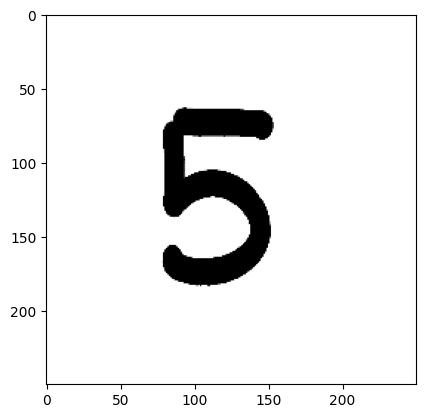

In [9]:
plt.imshow(data[300])

## Display Value at Lable index 300

In [10]:
labels[300]

'5'

## Label Mapping

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# init the LableEncoder
labelEncoder = LabelEncoder()
labelsEncoded = labelEncoder.fit_transform(df['label'])
df['label']=labelsEncoded
labelMapping = dict(zip(labelEncoder.classes_,labelEncoder.transform(labelEncoder.classes_)))
print('Mapping',labelMapping)

Mapping {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}


In [13]:
len(labels.unique()) #Cal number of item

62

## Data Spliting and Train Test Data

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data,labelsEncoded,test_size=0.2, random_state=25, shuffle=True)

# Building Model

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, activations
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.python.keras.layers import Dense

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model
from keras.utils import plot_model
from tensorflow.keras.models import Model

In [16]:
model = tf.keras.Sequential([
    
        tf.keras.layers.Resizing(227,227, interpolation="bilinear", input_shape = data.shape[1:]),
        tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(226, 226, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

        tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

        tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(62, activation='softmax')
    ])

D:\python\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
D:\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
 model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 227, 227, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 55, 55, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 13, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 13, 13, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │              

 Total params: 58,540,862 (223.32 MB)

 Trainable params: 58,538,110 (223.31 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [ ]:
model_trained = model.fit(xtrain, ytrain, batch_size=8, epochs=8, validation_split = 0.2)

Epoch 1/8
273/273 ━━━━━━━━━━━━━━━━━━━━ 143s 514ms/step - accuracy: 0.0306 - loss: 6.1865 - val_accuracy: 0.0678 - val_loss: 3.9054
Epoch 2/8
273/273 ━━━━━━━━━━━━━━━━━━━━ 146s 535ms/step - accuracy: 0.1309 - loss: 3.7564 - val_accuracy: 0.3608 - val_loss: 2.9378
Epoch 3/8
104/273 ━━━━━━━━━━━━━━━━━━━━ 1:44 620ms/step - accuracy: 0.2167 - loss: 3.1862

## Evaluating the performance of model


In [ ]:
loss, acc = model.evaluate(xtest, ytest, verbose=2)
print(f'Testing accuracy of model: {acc:.4f}')

## Making Model Predication

In [ ]:
y_pred = np.argmax(model.predict(xtest), axis=-1)

# Confusion matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix_AlexNet = confusion_matrix(ytest, y_pred_classes)

## Ploting Confusion Matrix

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(conf_matrix_AlexNet, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.subplot(221)
plt.plot(model_trained.history['accuracy'],'bo--', label = "acc")
plt.plot(model_trained.history['val_accuracy'], 'ro--', label = "val_acc")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(model_trained.history['loss'],'bo--', label = "loss")
plt.plot(model_trained.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()